In [1]:
pip install azure-cognitiveservices-vision-customvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import os, time, uuid

In [3]:
ENDPOINT = "your endpoint"
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": "your key"})
prediction_resource_id = "your project id"
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

In [4]:
publish_iteration_name = "Iteration1"

In [103]:
with open("n02109961_623.jpg", mode="rb") as test_data:
    results = predictor.detect_image(prediction_resource_id, publish_iteration_name, test_data)

# Display the results.    
for prediction in results.predictions:
    print("\t" + prediction.tag_name + ": {0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))

	dog: 97.68% bbox.left = 0.01, bbox.top = 0.07, bbox.width = 0.94, bbox.height = 0.86
	dog: 47.60% bbox.left = 0.25, bbox.top = 0.00, bbox.width = 0.61, bbox.height = 1.00
	dog: 11.19% bbox.left = 0.02, bbox.top = 0.02, bbox.width = 0.45, bbox.height = 0.89
	dog: 5.02% bbox.left = 0.73, bbox.top = 0.92, bbox.width = 0.27, bbox.height = 0.08


In [52]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

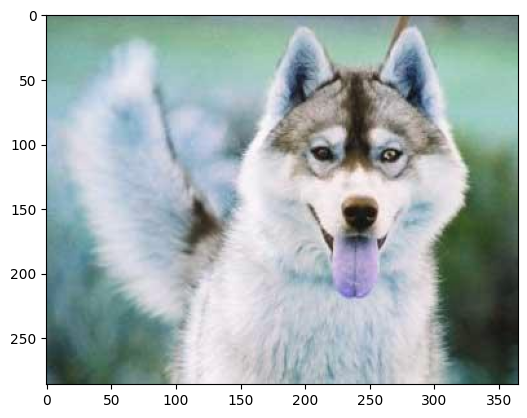

In [104]:
img = cv2.imread("n02109961_623.jpg")
plt.imshow(img)
plt.show()

In [105]:
img = img[:,:,[2,1,0]]   

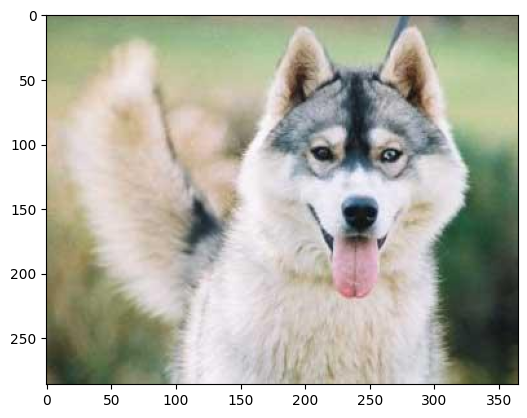

In [106]:
plt.imshow(img)
plt.show()

In [107]:
width = img.shape[1]
height = img.shape[0]
print(width, height)

365 286


In [108]:
def calculate_line_thickness(width, base_width=2048, base_thickness=60):
    thickness = int((width / base_width) * base_thickness)
    return max(1, thickness)

def draw_bounding_boxes(img, predictions):
    
    height, width = img.shape[:2]
    line_thickness = calculate_line_thickness(width)

    for prediction in predictions:
        if prediction.probability * 100 >= 80:
            left_top_x = int(prediction.bounding_box.left * width)
            left_top_y = int(prediction.bounding_box.top * height)
            right_bottom_x = int(left_top_x + prediction.bounding_box.width * width)
            right_bottom_y = int(left_top_y + prediction.bounding_box.height * height)

            cv2.rectangle(img, (left_top_x, left_top_y), (right_bottom_x, right_bottom_y), (204, 0, 0), line_thickness)

            font_scale = line_thickness / 60  
            cv2.putText(img, prediction.tag_name, (left_top_x, left_top_y - 10), cv2.FONT_HERSHEY_DUPLEX, font_scale, (204, 0, 0), line_thickness)

    cv2.imwrite("result.png", img)

img = img.copy()
draw_bounding_boxes(img, results.predictions)

'''
for prediction in results.predictions:
    print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100), prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height)
    # Draw retangle
    if prediction.probability * 100 >= 80:
        img = img.copy()
        width = img.shape[1]
        height = img.shape[0]
        # Re - calculate the left_top and right_bottom point
        new_lefttop_x = int(prediction.bounding_box.left * width)
        new_lefttop_y = int(prediction.bounding_box.top * height)
        new_rightbot_x = int(new_lefttop_x + (prediction.bounding_box.width * width))
        new_rightbot_y = int(new_lefttop_y + (prediction.bounding_box.height * height))
        print(new_lefttop_x, new_lefttop_y, new_rightbot_x, new_rightbot_y)
        cv2.rectangle(img,(new_lefttop_x,new_lefttop_y),(new_rightbot_x,new_rightbot_y),(204,0,0),60)
        cv2.putText(img, prediction.tag_name, (new_lefttop_x , int(new_lefttop_y - height * 0.05)), cv2.FONT_HERSHEY_DUPLEX,
  5, (204, 0, 0), 10, cv2.LINE_AA) 
cv2.imwrite("result.png", img)
'''


'\nfor prediction in results.predictions:\n    print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100), prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height)\n    # Draw retangle\n    if prediction.probability * 100 >= 80:\n        img = img.copy()\n        width = img.shape[1]\n        height = img.shape[0]\n        # Re - calculate the left_top and right_bottom point\n        new_lefttop_x = int(prediction.bounding_box.left * width)\n        new_lefttop_y = int(prediction.bounding_box.top * height)\n        new_rightbot_x = int(new_lefttop_x + (prediction.bounding_box.width * width))\n        new_rightbot_y = int(new_lefttop_y + (prediction.bounding_box.height * height))\n        print(new_lefttop_x, new_lefttop_y, new_rightbot_x, new_rightbot_y)\n        cv2.rectangle(img,(new_lefttop_x,new_lefttop_y),(new_rightbot_x,new_rightbot_y),(204,0,0),60)\n        cv2.putText(img, prediction.tag

In [109]:
img2 = cv2.imread("result.png")

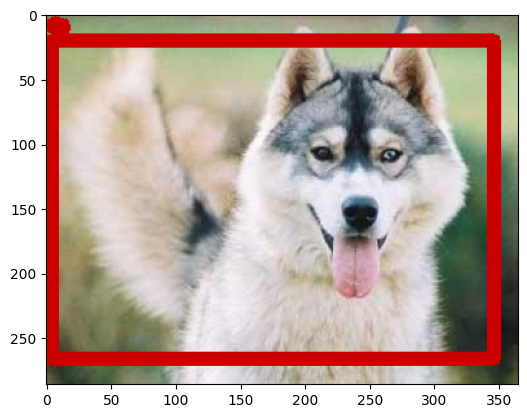

In [110]:
plt.imshow(img2)
plt.show()